In [225]:
#import all the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
#filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

## Reading both dataset
##### Application_data.csv And Previous_application

In [227]:
# connecting drive with colab

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [228]:
df = pd.read_csv(r'/content/drive/MyDrive/AAS EXam/application_data.csv') # reading the dataset
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [229]:
preapdf = pd.read_csv(r'/content/drive/MyDrive/AAS EXam/previous_application.csv')

In [230]:
preapdf.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## UnderStanding the data

In [231]:
#check the number of row and column in the datafreame
df.shape

(307511, 122)

In [232]:
preapdf.shape

(1670214, 37)

In [233]:
df.describe()
'''obervations: the above command returned the description of our dataset which include features like count, 
mean, std dev, min, IQR and max vakues of all the columns. '''

'obervations: the above command returned the description of our dataset which include features like count, \nmean, std dev, min, IQR and max vakues of all the columns. '

In [234]:
df.info(all) #gives all information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [235]:
preapdf.info(all) #gives all information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [236]:
preapdf.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [237]:
# Handling the null value in data
null_df = df.isnull().sum()/len(df)*100

In [238]:
# Columns having null values percentages greater than 50
null_df[null_df.values>50]

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

In [239]:
# we will consider dropping those columns which have null value greater then 40%
drop_col = null_df[null_df.values>40]

In [240]:
drop_col

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

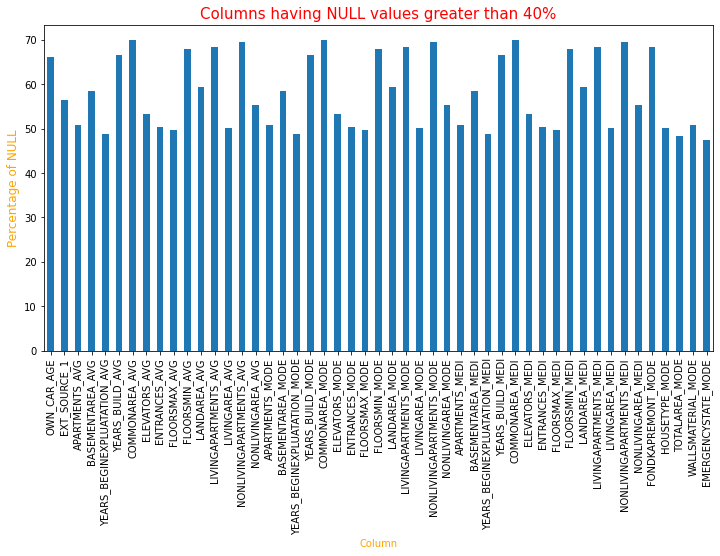

In [241]:
# Bar graphs for null values
plt.figure(figsize = (12,6))
drop_col.plot.bar()
plt.title('Columns having NULL values greater than 40%',fontdict={'fontsize':15,'color':'red'})
plt.xlabel('Column',fontdict={'fontsize':10,'fontweight':5,'color':'orange'})
plt.ylabel('Percentage of NULL',fontdict={'fontsize':12,'fontweight':5,'color':'orange'})

plt.show()

In [242]:
# we will dropping 49 columns in total
len(drop_col)

49

In [243]:
#dropping the column having null values greater than 40%
df.drop(labels = drop_col.index,axis = 1,inplace = True)

In [244]:
df.shape

(307511, 73)

In [245]:
# checking the null percentage in new columns
new_null = df.isnull().sum()/len(df)*100

In [246]:
app_df = df.copy()

In [247]:
new_null[new_null.values>0]

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [248]:
df[df.AMT_ANNUITY.isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,2.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,2.0


In [249]:
df = df[~df.AMT_ANNUITY.isna()].copy()

In [250]:
df.shape

(307499, 73)

In [251]:
new_null = df.isnull().sum()/len(df)*100
new_null[new_null.values>0]

AMT_GOODS_PRICE                0.090407
NAME_TYPE_SUITE                0.420164
OCCUPATION_TYPE               31.346769
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214635
EXT_SOURCE_3                  19.825756
OBS_30_CNT_SOCIAL_CIRCLE       0.332034
DEF_30_CNT_SOCIAL_CIRCLE       0.332034
OBS_60_CNT_SOCIAL_CIRCLE       0.332034
DEF_60_CNT_SOCIAL_CIRCLE       0.332034
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501833
AMT_REQ_CREDIT_BUREAU_DAY     13.501833
AMT_REQ_CREDIT_BUREAU_WEEK    13.501833
AMT_REQ_CREDIT_BUREAU_MON     13.501833
AMT_REQ_CREDIT_BUREAU_QRT     13.501833
AMT_REQ_CREDIT_BUREAU_YEAR    13.501833
dtype: float64

In [252]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    264355
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

most of the value are equal to 0.

In [253]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
dtype: float64

In [254]:
df.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
dtype: float64

In [255]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
dtype: float64

In [256]:
df.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
dtype: float64

In [257]:
df.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
dtype: float64

In [258]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
dtype: float64

All above columns values will be imputed with their mode....!!





In [259]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(0,inplace=True)
df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(0,inplace=True)
df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(0,inplace=True)
df.AMT_REQ_CREDIT_BUREAU_MON.fillna(0,inplace=True)
df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(0,inplace=True)
df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(0,inplace=True)

In [260]:
new_null_df = df.isnull().sum()/len(df)*100
new_null_df[new_null.values>0]

AMT_GOODS_PRICE                0.090407
NAME_TYPE_SUITE                0.420164
OCCUPATION_TYPE               31.346769
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214635
EXT_SOURCE_3                  19.825756
OBS_30_CNT_SOCIAL_CIRCLE       0.332034
DEF_30_CNT_SOCIAL_CIRCLE       0.332034
OBS_60_CNT_SOCIAL_CIRCLE       0.332034
DEF_60_CNT_SOCIAL_CIRCLE       0.332034
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR     0.000000
AMT_REQ_CREDIT_BUREAU_DAY      0.000000
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000
AMT_REQ_CREDIT_BUREAU_MON      0.000000
AMT_REQ_CREDIT_BUREAU_QRT      0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     0.000000
dtype: float64

still some columns have null values like occupation type has 31% null values,
and EXT_SOURCE_3 column with 19% ..!!

In [261]:
df.OCCUPATION_TYPE.value_counts()

Laborers                 55184
Sales staff              32101
Core staff               27569
Managers                 21370
Drivers                  18602
High skill tech staff    11379
Accountants               9812
Medicine staff            8536
Security staff            6720
Cooking staff             5945
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

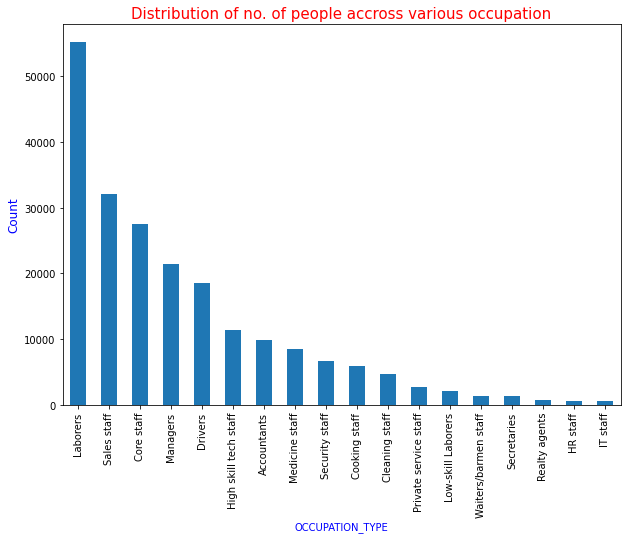

In [262]:
plt.figure(figsize = (10,7))
plt.title('Distribution of no. of people accross various occupation',fontdict={'fontsize':15,'color':'red'})
df.OCCUPATION_TYPE.value_counts().plot.bar()
plt.xlabel('OCCUPATION_TYPE',fontdict={'fontsize':10,'fontweight':5,'color':'blue'})
plt.ylabel('Count',fontdict={'fontsize':12,'fontweight':5,'color':'blue'})
plt.show()

In [263]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307499.000000,307499.000000,307499.000000,3.074990e+05,3.074990e+05,307499.000000,3.072210e+05,307499.000000,307499.000000,307499.000000,...,307499.00000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000
mean,278181.934868,0.080732,0.417068,1.687972e+05,5.990273e+05,27108.573909,5.383973e+05,0.020868,-16037.054212,63817.623992,...,0.00813,0.000595,0.000507,0.000335,0.005538,0.006055,0.029714,0.231282,0.229630,1.643400
std,102790.364944,0.272423,0.722131,2.371274e+05,4.024927e+05,14493.737315,3.694484e+05,0.013831,4364.000425,141277.920124,...,0.08980,0.024388,0.022518,0.018299,0.078016,0.103039,0.190708,0.856816,0.744069,1.855742
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189149.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278204.000000,0.000000,0.000000,1.469970e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367143.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.00000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


**## Observation from occupation column**
1.Observing the plot we can see Labourers are the highest applicant for loan..

2.imuputing the missing and null value if present with Labourers as it is mode of data.
3.creating new category as Missing.

In [264]:
df.OCCUPATION_TYPE.fillna(value='Missing',inplace=True)

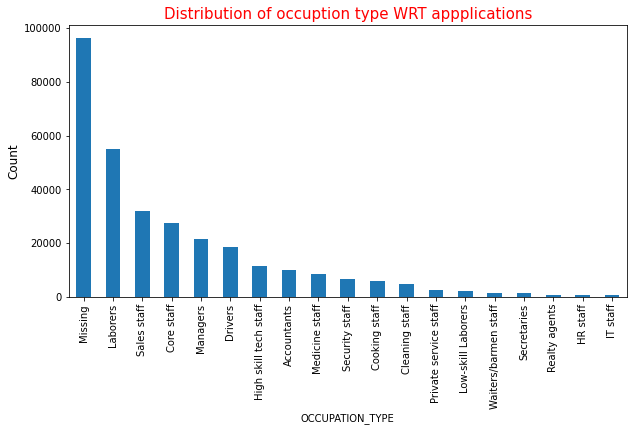

In [265]:
plt.figure(figsize = (10,5))
plt.title('Distribution of occuption type WRT appplications',fontdict={'fontsize':15,'color':'red'})
df.OCCUPATION_TYPE.value_counts().plot.bar()
plt.xlabel('OCCUPATION_TYPE',fontdict={'fontsize':10,'fontweight':5,'color':'black'})
plt.ylabel('Count',fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.show()

In [266]:
emptyrow=df.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(df)].index)
df.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))


0


In [267]:
new_null = df.isnull().sum()/len(df)*100
new_null[new_null.values>0]

AMT_GOODS_PRICE              0.090407
NAME_TYPE_SUITE              0.420164
CNT_FAM_MEMBERS              0.000650
EXT_SOURCE_2                 0.214635
EXT_SOURCE_3                19.825756
OBS_30_CNT_SOCIAL_CIRCLE     0.332034
DEF_30_CNT_SOCIAL_CIRCLE     0.332034
OBS_60_CNT_SOCIAL_CIRCLE     0.332034
DEF_60_CNT_SOCIAL_CIRCLE     0.332034
DAYS_LAST_PHONE_CHANGE       0.000325
dtype: float64

Analysis of the EXT_SOURCE_3.

In [268]:
df.EXT_SOURCE_3.value_counts().head()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
Name: EXT_SOURCE_3, dtype: int64

EXT_SOURCE as the missing percentage is very high, so let not replace it with anything.. it will add ambiguity.

In [269]:
#Columns having null values between 0 $ 1
new_null = df.isnull().sum()/len(df)*100
new_null[(new_null.values>0) & (new_null.values<1) ]

AMT_GOODS_PRICE             0.090407
NAME_TYPE_SUITE             0.420164
CNT_FAM_MEMBERS             0.000650
EXT_SOURCE_2                0.214635
OBS_30_CNT_SOCIAL_CIRCLE    0.332034
DEF_30_CNT_SOCIAL_CIRCLE    0.332034
OBS_60_CNT_SOCIAL_CIRCLE    0.332034
DEF_60_CNT_SOCIAL_CIRCLE    0.332034
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

Handling null values in AMT_GOODS_PRICE

In [270]:
df.AMT_GOODS_PRICE.value_counts().head()

450000.0    26019
225000.0    25281
675000.0    24962
900000.0    15416
270000.0    11428
Name: AMT_GOODS_PRICE, dtype: int64

In [271]:
#Checking the IQR of AMT_GOODS_PRICE
df.AMT_GOODS_PRICE.quantile(q=[0.25,0.5,0.75,0.95,0.99,1])

0.25     238500.0
0.50     450000.0
0.75     679500.0
0.95    1305000.0
0.99    1800000.0
1.00    4050000.0
Name: AMT_GOODS_PRICE, dtype: float64

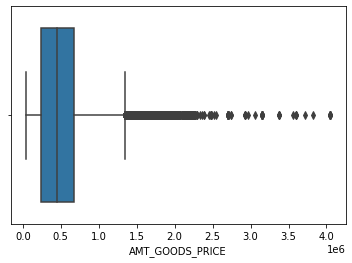

In [272]:
sns.boxplot(df.AMT_GOODS_PRICE)
plt.show()
#boxplot of AMT_GOODS_PRICE

In [273]:
#Mode of the AMT_GOODS_PRICE
df.AMT_GOODS_PRICE.mode()[0]

450000.0

In [274]:
#mean of AMT_GOODS_PRICE
df.AMT_GOODS_PRICE.describe()

count    3.072210e+05
mean     5.383973e+05
std      3.694484e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

Observations:
1. We can see that mode and median is close to eachother..
2. Mean and median are very close to each other. Hence, we can use it for imputation.

In [275]:
#imputing null values with mode of AMT_GOODS_PRICE
df.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.mode()[0],inplace=True)

In [276]:
df.AMT_GOODS_PRICE.isna().sum()
# no null value remains

0

Checking the features of the NAME_TYPE_SUITE column

In [277]:
df.NAME_TYPE_SUITE.value_counts()
#count of every unique category of the NAME_TYPE_SUITE column

Unaccompanied      248515
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [278]:
#percentage of each category in NAME_TYPE_SUITE
df.NAME_TYPE_SUITE.value_counts(normalize=True)*100
# Unaccompanied covers most part in it..

Unaccompanied      81.159151
Family             13.111392
Spouse, partner     3.713174
Children            1.066925
Other_B             0.578040
Other_A             0.282815
Group of people     0.088502
Name: NAME_TYPE_SUITE, dtype: float64

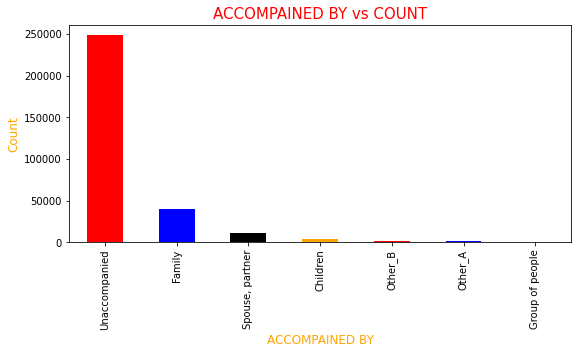

In [279]:
plt.figure(figsize = (9,4))
df.NAME_TYPE_SUITE.value_counts().plot.bar(color={'red','blue','orange','black'})
plt.title('ACCOMPAINED BY vs COUNT',fontdict={'fontsize':15,'color':'red'})
plt.xlabel('ACCOMPAINED BY',fontdict={'fontsize':12,'fontweight':5,'color':'orange'})
plt.ylabel('Count',fontdict={'fontsize':12,'fontweight':5,'color':'orange'})
plt.show()

Obeservation:
form the graph and command we can conclude that 81% of the times the loan applicant are Unaccompained
So we can impute the missing value by unaccompained

In [280]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head()
#count of the values of each category in OBS_30_CNT_SOCIAL_CIRCLE column

0.0    163901
1.0     48780
2.0     29808
3.0     20322
4.0     14143
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [281]:
#Percentile values for DEF_30_CNT_SOCIAL_CIRCLE
df.OBS_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,0.99,1])

0.25      0.0
0.50      0.0
0.75      2.0
0.99     10.0
1.00    348.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

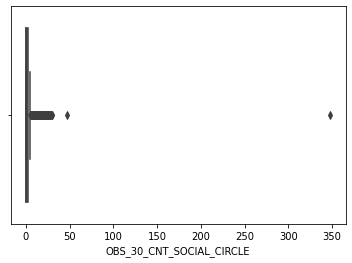

In [282]:
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()
#Box plot of OBS_30_CNT_SOCIAL_CIRCLE column

In [283]:

df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]
#mode of DEF_30_CNT_SOCIAL_CIRCLE

0.0

In [284]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mean()
#mean of DEF_30_CNT_SOCIAL_CIRCLE

1.4222913227050555

In [285]:
df.OBS_30_CNT_SOCIAL_CIRCLE.describe()
#complete information of the column 

count    306478.000000
mean          1.422291
std           2.401023
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

Observation from DEF_30_CNT_SOCIAL_CIRCLE column:
1. Median and mode are close to each other '
2. Till 50% of the all the values are 0.
3. Mean and mode are closer, so we can use it for imputation.

In [286]:
# imputing the missing values in OBS_30_CNT_SOCIAL_CIRCLE column with 0
df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)

In [287]:
df.OBS_30_CNT_SOCIAL_CIRCLE.isnull().sum()
# conclude that non zero value remains

0

Analysis of  DEF_30_CNT_SOCIAL_CIRCLE column



In [288]:
df.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()
#count of every unique category of the DEF_30_CNT_SOCIAL_CIRCLE column

0.0     271312
1.0      28328
2.0       5323
3.0       1192
4.0        253
5.0         56
6.0         11
7.0          1
34.0         1
8.0          1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [289]:
#IQR values for DEF_30_CNT_SOCIAL_CIRCLE
df.DEF_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,0.99,1])

0.25     0.0
0.50     0.0
0.75     0.0
0.99     2.0
1.00    34.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

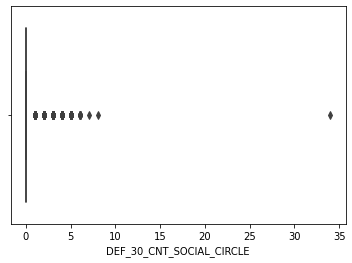

In [290]:
sns.boxplot(df.DEF_30_CNT_SOCIAL_CIRCLE)
#box plot of DEF_30_CNT_SOCIAL_CIRCLE column

In [291]:
#Checking the most recurring value in DEF_30_CNT_SOCIAL_CIRCLE
df.DEF_30_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

In [292]:
df.DEF_30_CNT_SOCIAL_CIRCLE.mean()

0.1434262818212074

Observation:
1. Median and mode are almost similare
2. DEF_30_CNT_SOCIAL_CIRCLE column contain many outliers
3. Mean and mode are closer, so we can use it for imputation.

In [293]:
# Replacing missing values in DEF_30_CNT_SOCIAL_CIRCLE with 0
df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)

In [294]:
df.DEF_30_CNT_SOCIAL_CIRCLE.isnull().sum()
#conclude no null value remains

0

Analysis of DEF_60_CNT_SOCIAL_CIRCLE

In [295]:
df.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()
#count of every unique category of the DEF_60_CNT_SOCIAL_CIRCLE column

0.0     280709
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
7.0          1
24.0         1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [296]:
#IQR values for DEF_60_CNT_SOCIAL_CIRCLE
df.DEF_60_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,0.99,1])

0.25     0.0
0.50     0.0
0.75     0.0
0.99     2.0
1.00    24.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

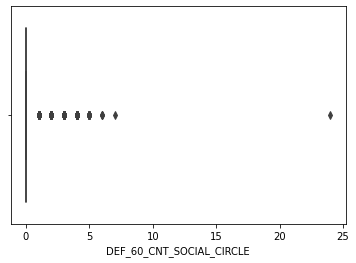

In [297]:
sns.boxplot(df.DEF_60_CNT_SOCIAL_CIRCLE)
plt.show()
#box plot of DEF_60_CNT_SOCIAL_CIRCLE

In [298]:
#mode of DEF_60_CNT_SOCIAL_CIRCLE
df.DEF_60_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

In [299]:
df.DEF_60_CNT_SOCIAL_CIRCLE.mean()
#mean of DEF_60_CNT_SOCIAL_CIRCLE


0.10005285860649052

Observation:
1. Median and mode are same i.e '0' , so we can use it for imputation.
2. Till 75th percentile all the values are 0, above it there are 8 outliers

In [300]:
# Replacing missing values if present in DEF_60_CNT_SOCIAL_CIRCLE with 0
df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)

In [301]:
df.DEF_60_CNT_SOCIAL_CIRCLE.isnull().sum()
#conclude no null value present..

0

Analysis of OBS_60_CNT_SOCIAL_CIRCLE

In [302]:
df.OBS_60_CNT_SOCIAL_CIRCLE.value_counts().head()

0.0    164657
1.0     48867
2.0     29766
3.0     20215
4.0     13946
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [303]:
#IQR values for OBS_60_CNT_SOCIAL_CIRCLE
df.OBS_60_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,0.99,1])

0.25      0.0
0.50      0.0
0.75      2.0
0.99     10.0
1.00    344.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

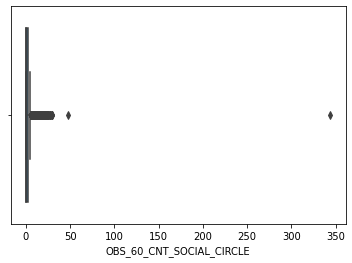

In [304]:
sns.boxplot(df.OBS_60_CNT_SOCIAL_CIRCLE)
plt.show()
#box plot of OBS_60_CNT_SOCIAL_CIRCLE 

In [305]:
#Checking the most recurring value in OBS_60_CNT_SOCIAL_CIRCLE
df.OBS_60_CNT_SOCIAL_CIRCLE.mode()[0]

0.0

In [306]:
df.OBS_60_CNT_SOCIAL_CIRCLE.mean()
#mean value

1.4053374141047645

Observation:
1. Median and mode are same i.e '0'
2. Till 50th percentile all the values are 0, above it there are 2 outliers
3. Mean and mode are closer, so we can use it for imputation.

In [307]:
# Replacing missing values in OBS_30_CNT_SOCIAL_CIRCLE with 0
df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(0,inplace=True)

In [308]:
#Checking the null values in all columns
new_null = df.isnull().sum()/len(df)*100
new_null[(new_null.values>0) & (new_null.values<1)]

NAME_TYPE_SUITE           0.420164
CNT_FAM_MEMBERS           0.000650
EXT_SOURCE_2              0.214635
DAYS_LAST_PHONE_CHANGE    0.000325
dtype: float64

We can ignore the remaining null values as the count is very low

Dealing with errors in Data types and data

In [309]:
#Lets analyze data types and values of other columns
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307499 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307499 non-null  int64  
 1   TARGET                       307499 non-null  int64  
 2   NAME_CONTRACT_TYPE           307499 non-null  object 
 3   CODE_GENDER                  307499 non-null  object 
 4   FLAG_OWN_CAR                 307499 non-null  object 
 5   FLAG_OWN_REALTY              307499 non-null  object 
 6   CNT_CHILDREN                 307499 non-null  int64  
 7   AMT_INCOME_TOTAL             307499 non-null  float64
 8   AMT_CREDIT                   307499 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307499 non-null  float64
 11  NAME_TYPE_SUITE              306207 non-null  object 
 12  NAME_INCOME_TYPE             307499 non-null  object 
 13 

Lets analysze all the columns

In [310]:
df.CODE_GENDER.value_counts()
# number of male and female count 

F      202440
M      105055
XNA         4
Name: CODE_GENDER, dtype: int64

In [311]:
df.CODE_GENDER.value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [312]:
#Replacing XNA with 'F' by using function

def replace(Gender):
    if Gender == 'XNA':
        return 'F'
    else:
        return Gender

In [313]:
df.CODE_GENDER = df.CODE_GENDER.apply(replace)
# as female are more in number so XNA will be replace with female

In [314]:
df.CODE_GENDER.value_counts()

F    202444
M    105055
Name: CODE_GENDER, dtype: int64

In [315]:
# values of following columns are negative which cannot be possible logically...
print(df['DAYS_BIRTH'].unique())
print(df['DAYS_EMPLOYED'].unique())
print(df['DAYS_REGISTRATION'].unique())
print(df['DAYS_ID_PUBLISH'].unique())
print(df['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [316]:
#Creating series for columns which has days, and converting them to positive value because day's cannot be negative
negative_days = [column for column in df if column.startswith('DAYS')]
negative_days

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [317]:
#making the values of negative_days[] list to positive values using abs command
df[negative_days] = abs(df[negative_days])

In [318]:
print(df['DAYS_BIRTH'].unique())
print(df['DAYS_EMPLOYED'].unique())
print(df['DAYS_REGISTRATION'].unique())
print(df['DAYS_ID_PUBLISH'].unique())
print(df['DAYS_LAST_PHONE_CHANGE'].unique())
# after converting we dealt with the negative values from the above columns

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [319]:
#Organization Type column ==> count of each category of the organization_type column
df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67989
XNA                       55374
Self-employed             38409
Other                     16681
Medicine                  11192
Business Entity Type 2    10553
Government                10403
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3246
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [320]:
(df.ORGANIZATION_TYPE.value_counts(normalize=True)*100).head()

Business Entity Type 3    22.110316
XNA                       18.007863
Self-employed             12.490772
Other                      5.424733
Medicine                   3.639687
Name: ORGANIZATION_TYPE, dtype: float64

We can observe 18% of the data is XNA, we cannot impute by mean/mode because then the result may get biased. We will create new category as unknown

In [321]:
df.ORGANIZATION_TYPE = df.ORGANIZATION_TYPE.apply(lambda x: 'Unknown' if x == 'XNA' else x)
#replacing XNA with Unknown value

In [322]:
(df.ORGANIZATION_TYPE.value_counts(normalize=True)*100).head()

Business Entity Type 3    22.110316
Unknown                   18.007863
Self-employed             12.490772
Other                      5.424733
Medicine                   3.639687
Name: ORGANIZATION_TYPE, dtype: float64

Converting all the Days column to Year

As analysis the data with days will be inapporpriate so lets convert it into years..

In [323]:
Days_column = [column for column in df if column.startswith('DAYS')]
df[Days_column] = df[Days_column]/365
df[Days_column].describe()
#converted days into years format

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307499.000000,307499.000000,307499.000000,307499.000000,307498.000000
mean,43.937135,185.554239,13.660574,8.203322,2.637978
std,11.956166,382.043486,9.651664,4.135487,2.265231
min,20.517808,0.000000,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329,0.750685
50%,43.150685,6.079452,12.339726,8.915068,2.073973
75%,53.923288,15.635616,20.490411,11.778082,4.301370
max,69.120548,1000.665753,67.594521,19.717808,11.758904


In [324]:
#renaming the columns
df.rename(columns={'DAYS_BIRTH':'AGE' ,'DAYS_EMPLOYED':'WORK_EXPERIENCE' ,
    'DAYS_REGISTRATION':'YEARS_REGISTRATION' ,'DAYS_ID_PUBLISH':'ID_CHANGE_YEAR','DAYS_LAST_PHONE_CHANGE':'YEARS_LAST_PHONE_CHANGE' },inplace=True)

# Dealing with Outliers

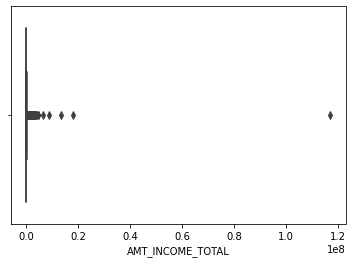

In [325]:

sns.boxplot(df.AMT_INCOME_TOTAL)
plt.show()
#box plot of the AMT_INCOME_TOTAL to get the idea of outliers

In [326]:
#IQR and spread of AMT_INCOME_TOTAL
df.AMT_INCOME_TOTAL.quantile(q=[0.25,0.5,0.75,0.95,0.99,1])

0.25       112500.0
0.50       146997.0
0.75       202500.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [327]:
# can see a large value
Max_Annual_income =df[df.AMT_INCOME_TOTAL == df.AMT_INCOME_TOTAL.max()]
Max_Annual_income 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [328]:
Max_Annual_income.OCCUPATION_TYPE

12840    Laborers
Name: OCCUPATION_TYPE, dtype: object

In [329]:
#Before deleting
df.shape

(307499, 73)

In [330]:
#From above two results we can infer that this a outlier since the person is a labourer and the target variable is also 1.
#We will remove this row as we don't want this data to impact our analysis
newdf = df[df.index!=12840]

In [331]:
#After deleting
newdf.shape

(307498, 73)

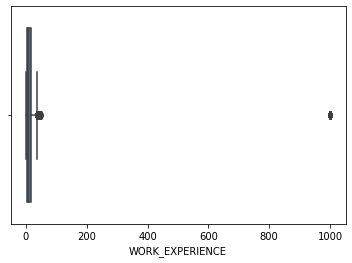

In [332]:
# Finding outlier on WORK_EXPERIENCE column
sns.boxplot(newdf.WORK_EXPERIENCE)
plt.show() 

In [333]:
#In the above boxplot we can see work_experience as more than 1000 which is practically impossible...
newdf[newdf.WORK_EXPERIENCE>999]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0
307505,456249,0,Cash loans,F,N,Y,0,112500.000,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0


In [334]:
#We can see there are 55374 records we cannot drop the data completetly, lets see IQR 
newdf.WORK_EXPERIENCE.quantile([0.25,0.5,0.75,0.8,0.9,0.95,0.99])
# 80% data is below 25 years

0.25       2.556164
0.50       6.079452
0.75      15.635616
0.80      25.178082
0.90    1000.665753
0.95    1000.665753
0.99    1000.665753
Name: WORK_EXPERIENCE, dtype: float64

The values above 1000 WORK_EXPERIENCE are outliers

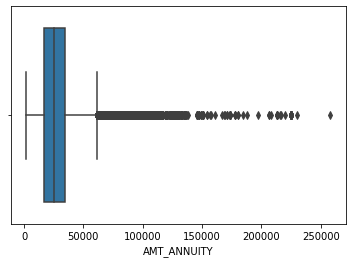

In [335]:
# outlier on AMT_ANNUITY column
sns.boxplot(newdf['AMT_ANNUITY'])
plt.show()

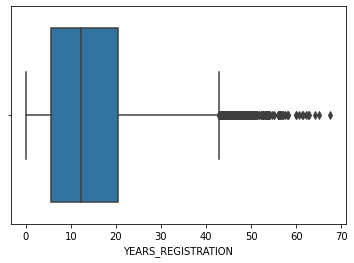

In [336]:
#  outlier on YEARS_REGISTRATION column
sns.boxplot(newdf['YEARS_REGISTRATION'])
plt.show() 


Binning the values for AMT_INCOME_RANGE 

Binning is useful in analyze continuous variables
 Binning 'AMT_INCOME_RANGE' 
0-0.2 ----> Extremly Low
0.2-0.5 ----> Low
0.5-0.8 ----> Medium
0.8-0.95 ----> High
0.95 - 1 ----> Extremely High

In [337]:

newdf['AMT_INCOME_RANGE'] = pd.qcut(newdf.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['EXTREMLY_LOW', 'LOW', "MEDIUM", 'HIGH', 'EXTREMLY_HIGH'])
newdf['AMT_INCOME_RANGE'].head()

0          MEDIUM
1            HIGH
2    EXTREMLY_LOW
3             LOW
4             LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['EXTREMLY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'EXTREMLY_HIGH']

In [338]:
#Binning Amount credit range
newdf['AMT_CREDIT_RANGE'] = pd.qcut(newdf.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
newdf['AMT_CREDIT_RANGE'].head()

0         LOW
1        HIGH
2    VERY_LOW
3         LOW
4         LOW
Name: AMT_CREDIT_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

# Data Imbalance for target variable

In [339]:
newdf.TARGET.value_counts()

0    282674
1     24824
Name: TARGET, dtype: int64

In [340]:
newdf.TARGET.value_counts(normalize=True)*100

0    91.927102
1     8.072898
Name: TARGET, dtype: float64

We can see clearly that there is imbalance in TARGET variable, let's plot a bar chart to support our inference

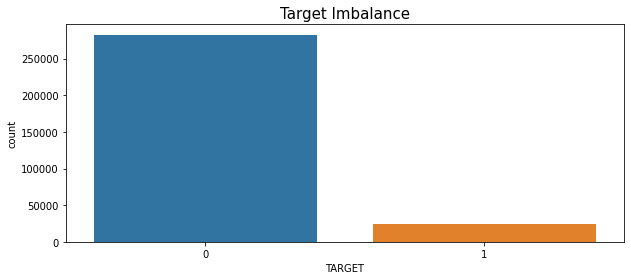

In [341]:
plt.figure(figsize=[10,4])
sns.countplot(x = newdf['TARGET'], data = newdf)
plt.title('Target Imbalance',fontdict={'fontsize':15})
plt.show()

In [342]:
#dividing the dataset into two dataframe, one for client's with payment difficulties(1) which is 8% and 
#other where client are not facing difficulty(0) which is 91%
df_target0 = newdf[newdf.TARGET==0]
df_target1 = newdf[newdf.TARGET==1]

In [343]:
df_target0.shape

(282674, 75)

In [344]:
df_target1.shape

(24824, 75)

# Univariate Analysis

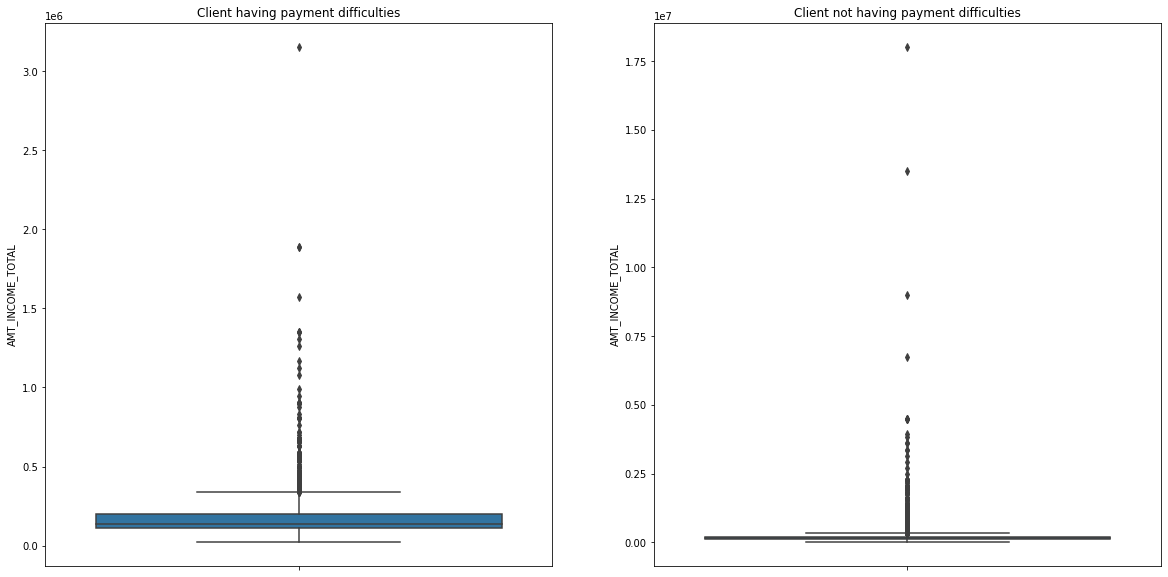

In [345]:
#Total income of applicant can be called as most important in deciding target variable..
plt.figure(figsize=[20,10])

plt.subplot(1,2,1)
ax = sns.boxplot(y=df_target1['AMT_INCOME_TOTAL'])
plt.title('Client having payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=df_target0['AMT_INCOME_TOTAL'])
plt.title('Client not having payment difficulties')
plt.show()

Concluded: Total income is higher for client without payment difficulties as compared to client with payment difficulties

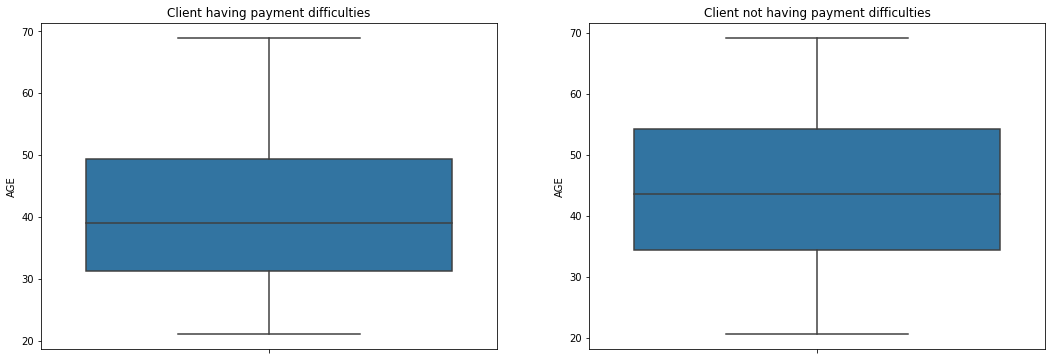

In [346]:
#Analysis of the age group for applicants
plt.figure(figsize=[18,6])

plt.subplot(1,2,1)
ax = sns.boxplot(y=df_target1.AGE)
plt.title('Client having payment difficulties')

plt.subplot(1,2,2)                  
ax = sns.boxplot(y=df_target0.AGE)
plt.title('Client not having payment difficulties')
plt.show()

#By observing the boxplot, we can infer that Client having payment difficulties are in range of 31-49, 
# whereas client  not having payment difficulties are in range 34-54

Categorical Variable

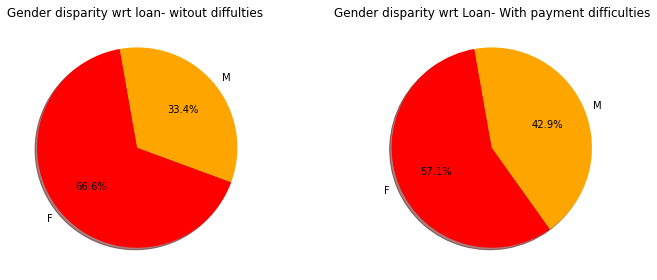

In [347]:
g_count = df_target0.CODE_GENDER.value_counts()
f_count = df_target1.CODE_GENDER.value_counts()

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.pie(g_count.values,labels=g_count.index,colors=['red','orange'], autopct='%1.1f%%',shadow=True, startangle=100)
plt.title("Gender disparity wrt loan- witout diffulties ")

plt.subplot(1,2,2)
plt.pie(f_count.values,labels=f_count.index,colors=['red','orange'], autopct='%1.1f%%',shadow=True, startangle=100)
plt.title("Gender disparity wrt Loan- With payment difficulties")
plt.tight_layout()
plt.show()
#Conclusion : male are able to pay loan with ease as compare with female..

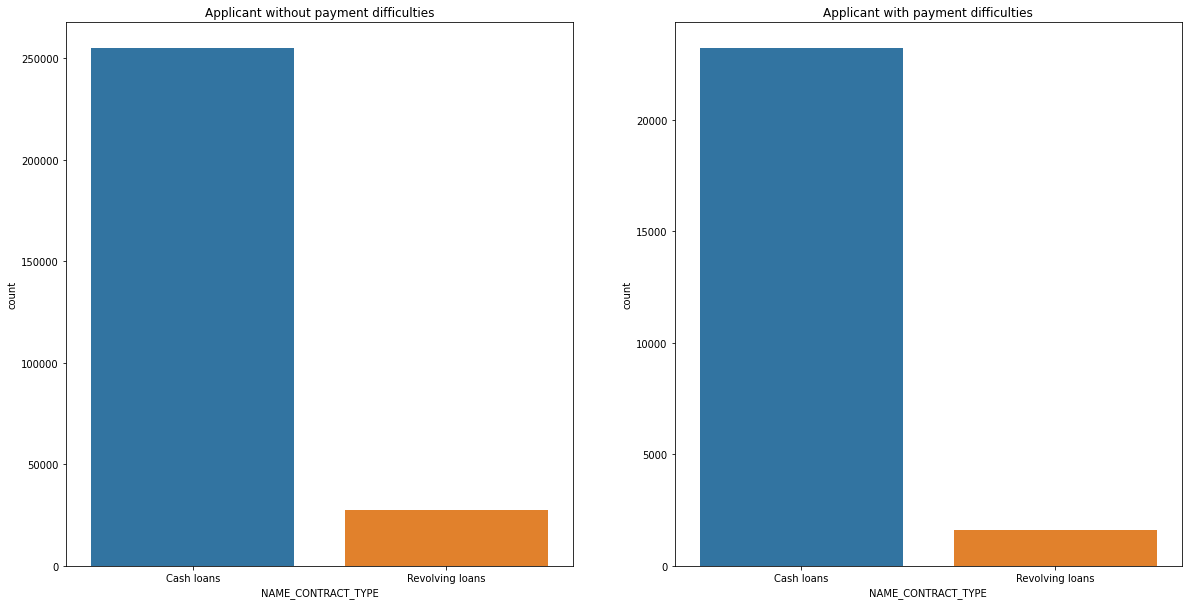

In [348]:
#Based on NAME_CONTRACT_TYPE
plt.figure(figsize=(20,10)) 

plt.subplot(1,2,1)
ax = sns.countplot(df_target0['NAME_CONTRACT_TYPE'])
plt.title('Applicant without payment difficulties')

plt.subplot(1,2,2)
ax = sns.countplot(df_target1['NAME_CONTRACT_TYPE'])
plt.title('Applicant with payment difficulties')
plt.show()

#countplot, no significant difference for NAME_CONTRACT_TYPE

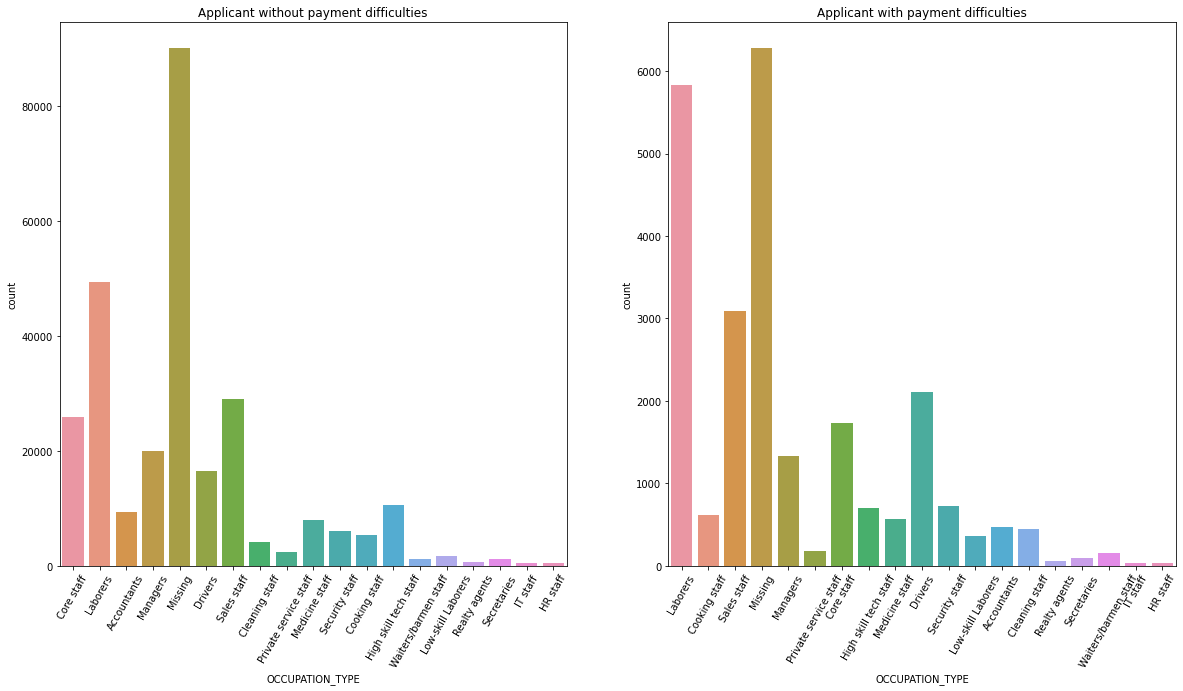

In [349]:
# Based on the OCCUPATION_TYPE
plt.figure(figsize=(20,10)) 

plt.subplot(1,2,1)
ax = sns.countplot(df_target0['OCCUPATION_TYPE'])
plt.title('Applicant without payment difficulties')
plt.xticks(rotation=60)

plt.subplot(1,2,2)
ax = sns.countplot(df_target1['OCCUPATION_TYPE'])
plt.title('Applicant with payment difficulties')
plt.xticks(rotation=60)
plt.show()

#We can clearly observe that labourers are the highest in both categories i.e applicant with and without payment difficulties.

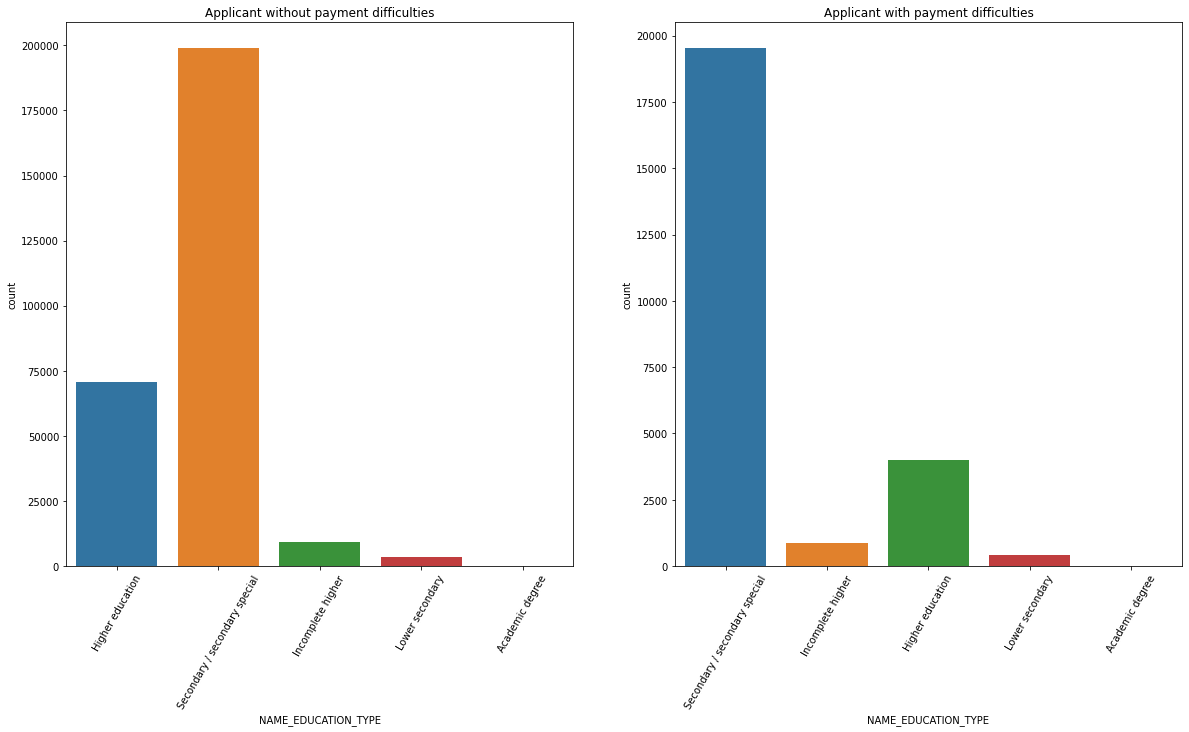

In [350]:
# NAME_EDUCATION_TYPE
plt.figure(figsize=(20,10)) 

plt.subplot(1,2,1)
ax = sns.countplot(df_target0['NAME_EDUCATION_TYPE'])
plt.title('Applicant without payment difficulties')
plt.xticks(rotation=60)

plt.subplot(1,2,2)
ax = sns.countplot(df_target1['NAME_EDUCATION_TYPE'])
plt.title('Applicant with payment difficulties')
plt.xticks(rotation=60)
plt.show()

# .

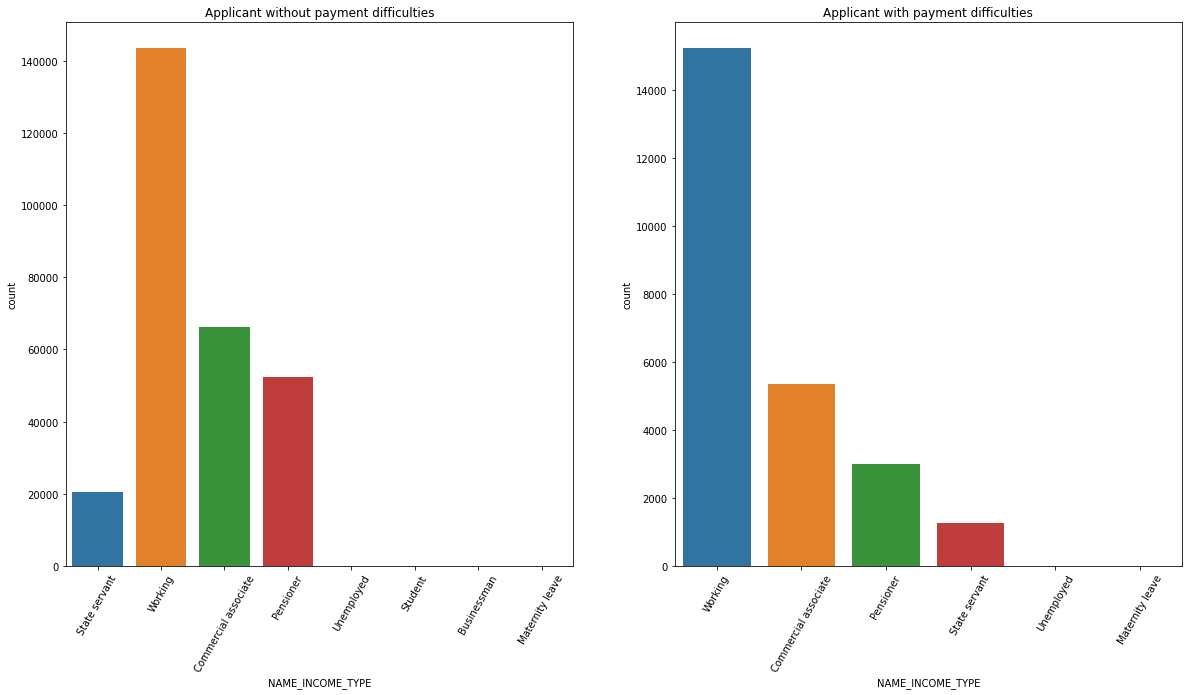

In [351]:
# Based upon the NAME_INCOME_TYPE
plt.figure(figsize=(20,10)) 

plt.subplot(1,2,1)
ax = sns.countplot(df_target0['NAME_INCOME_TYPE'])
plt.title('Applicant without payment difficulties')
plt.xticks(rotation=60)

plt.subplot(1,2,2)
ax = sns.countplot(df_target1['NAME_INCOME_TYPE'])
plt.title('Applicant with payment difficulties')
plt.xticks(rotation=60)
plt.show()



# Bivariate Analysis

In [352]:
Amt_col = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AGE','AMT_GOODS_PRICE']
Amt_col

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AGE', 'AMT_GOODS_PRICE']

<Figure size 1584x1008 with 0 Axes>

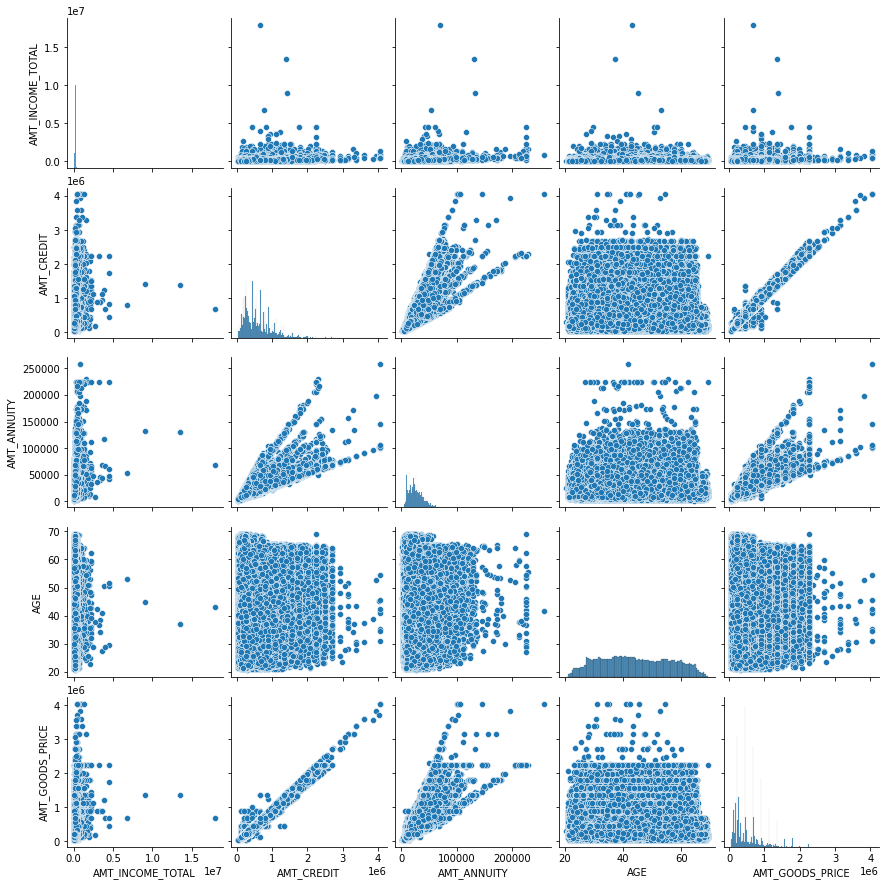

In [353]:
#Pair plot for AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AGE,AMT_GOODS_PRICE
plt.figure(figsize=[22,14])
plot_pair=df_target0[Amt_col]
sns.pairplot(plot_pair)
plt.show()

# correlation between different variables of Amt_col

<Figure size 1584x1008 with 0 Axes>

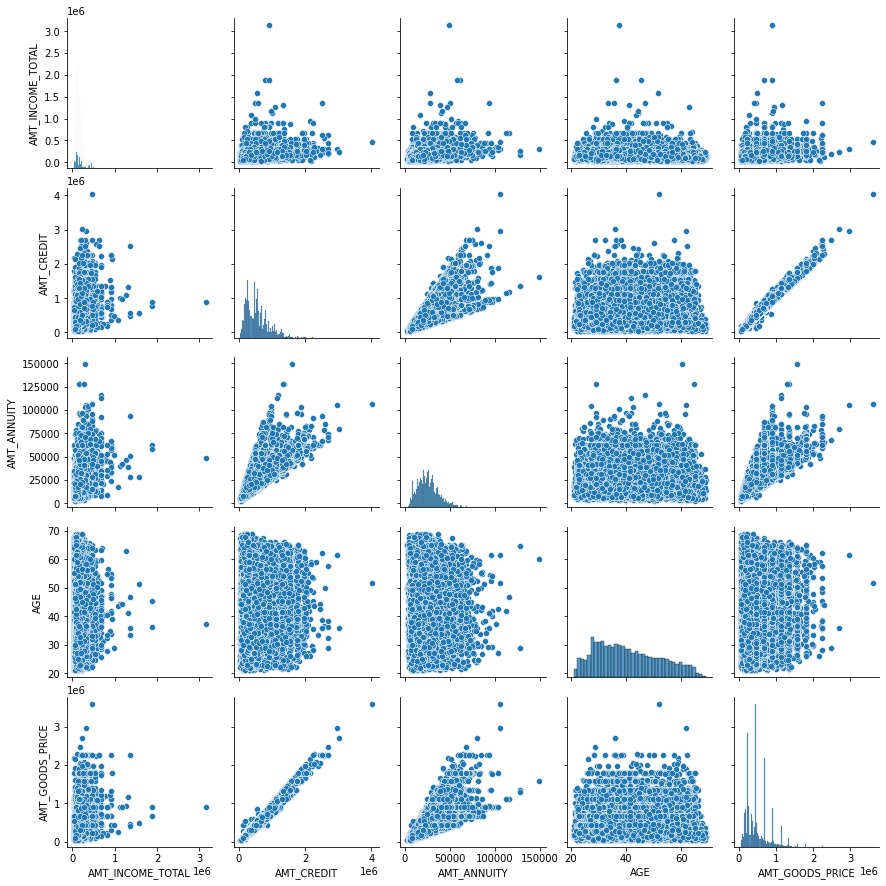

In [354]:
plt.figure(figsize=[22,14])
plot_pair=df_target1[Amt_col]
sns.pairplot(plot_pair)
plt.show()


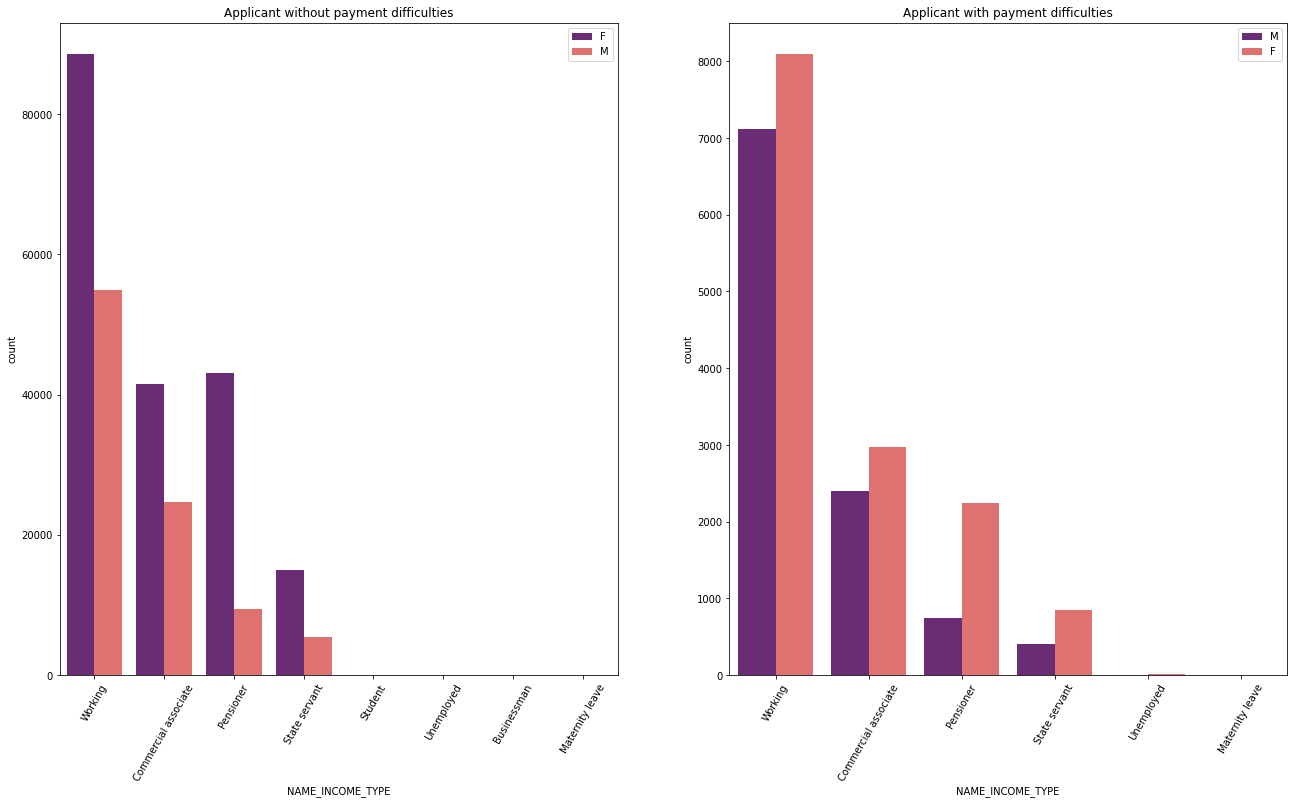

In [355]:
# Plotting for Income type With respect to gender parameter
plt.figure(figsize=(22,12))
plt.subplot(1,2,1)
ax = sns.countplot(data = df_target0, x= df_target0.NAME_INCOME_TYPE, order=df_target0['NAME_INCOME_TYPE'].value_counts().index,hue = 'CODE_GENDER',palette='magma')
plt.title('Applicant without payment difficulties')
plt.legend(loc='upper right')
plt.xticks(rotation=60)

plt.subplot(1,2,2)
ax = sns.countplot(data = df_target1, x= df_target1.NAME_INCOME_TYPE, order=df_target1['NAME_INCOME_TYPE'].value_counts().index,hue = 'CODE_GENDER',palette='magma')
plt.title('Applicant with payment difficulties')
plt.xticks(rotation=60)
plt.legend(loc='upper right')
plt.show()

#Female applicant's have more diffculties in payment as compared to male applicant's
#Applicant's who are businessman and student's pay their loan on time or they their application for loan is less ...

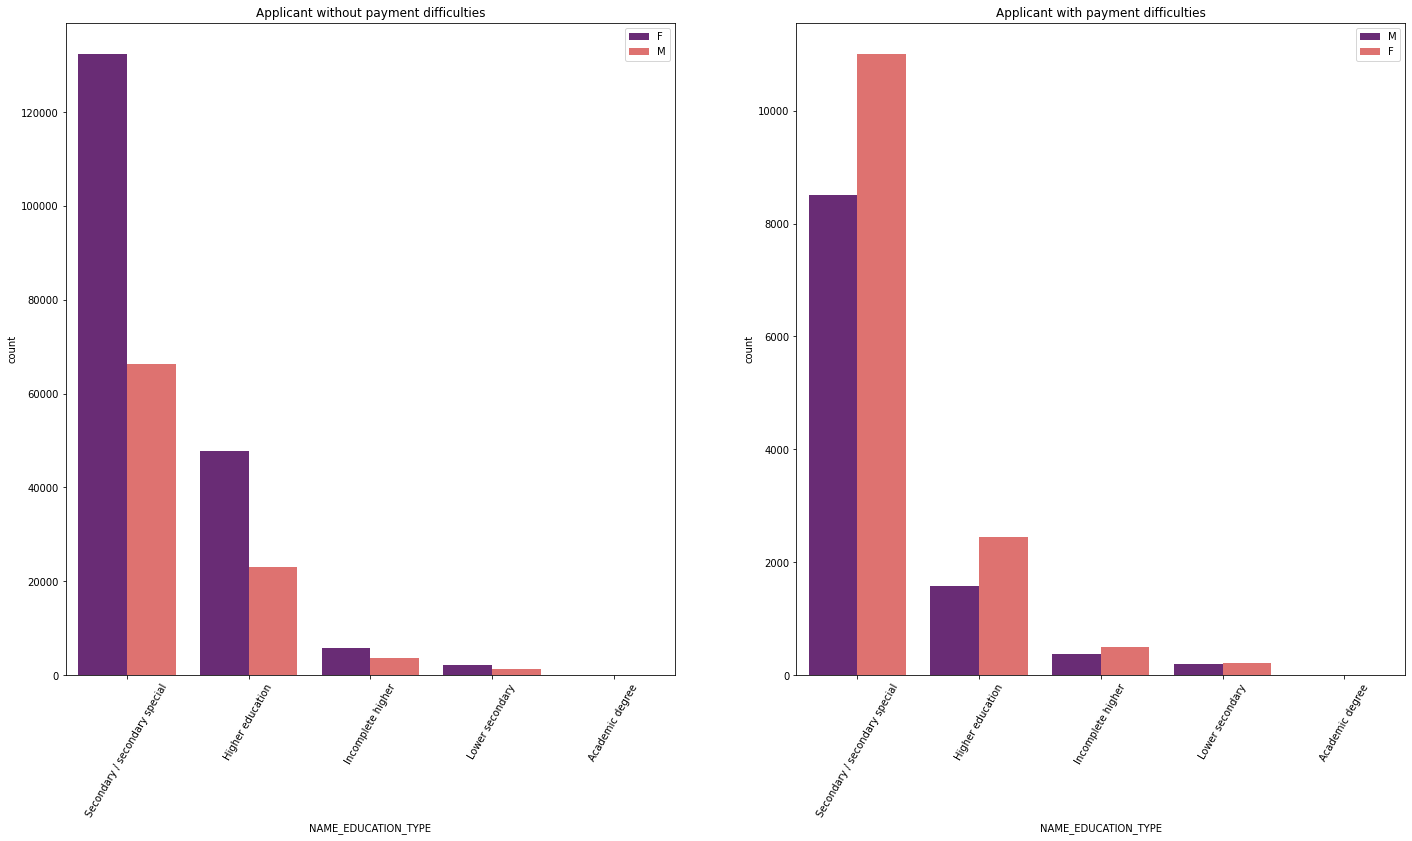

In [356]:
# Plotting for Income type accross Education type
plt.figure(figsize=(24,12))
plt.subplot(1,2,1)
ax = sns.countplot(data = df_target0, x= df_target0.NAME_EDUCATION_TYPE, order=df_target0['NAME_EDUCATION_TYPE'].value_counts().index,hue = 'CODE_GENDER',palette='magma')
plt.title('Applicant without payment difficulties')
plt.legend(loc='upper right')
plt.xticks(rotation=60)

plt.subplot(1,2,2)
ax = sns.countplot(data = df_target1, x= df_target1.NAME_EDUCATION_TYPE, order=df_target1['NAME_EDUCATION_TYPE'].value_counts().index,hue = 'CODE_GENDER',palette='magma')
plt.title('Applicant with payment difficulties')
plt.xticks(rotation=60)
plt.legend(loc='upper right')
plt.show()

#Applicant's who have higher education have less difficulty in paying loan as compared to Secondary/secondary special.

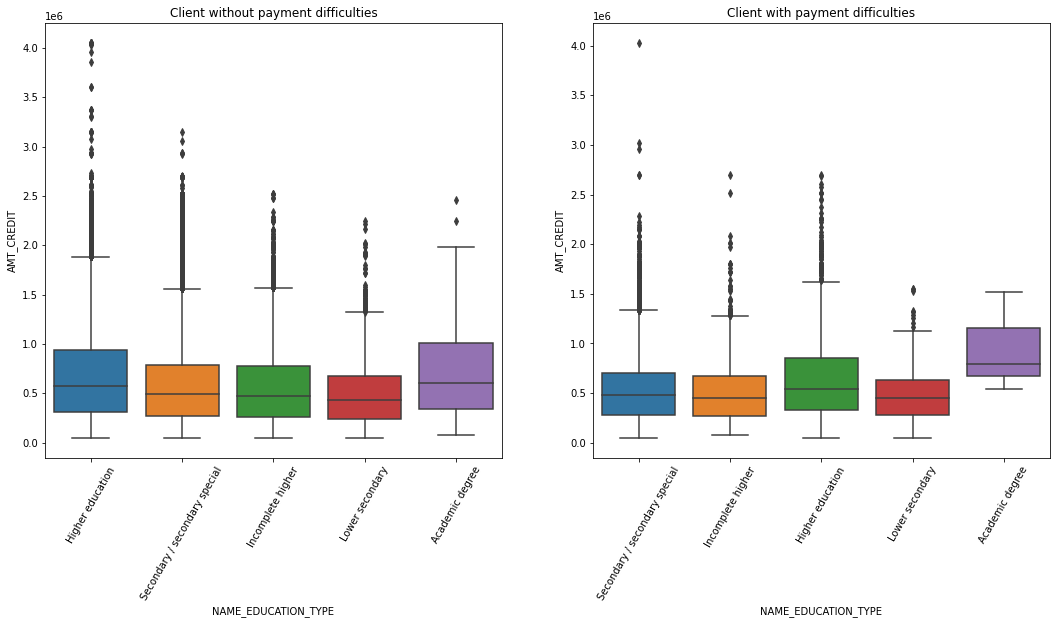

In [357]:
# Numerical categorical analysis of AMT_CREDIT vs NAME_EDUCATION_TYPE
plt.figure(figsize=(18,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=df_target0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Client without payment difficulties')
plt.xticks(rotation=60)

plt.subplot(1,2,2)
ax = sns.boxplot(data=df_target1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Client with payment difficulties')
plt.xticks(rotation=60)

plt.show()

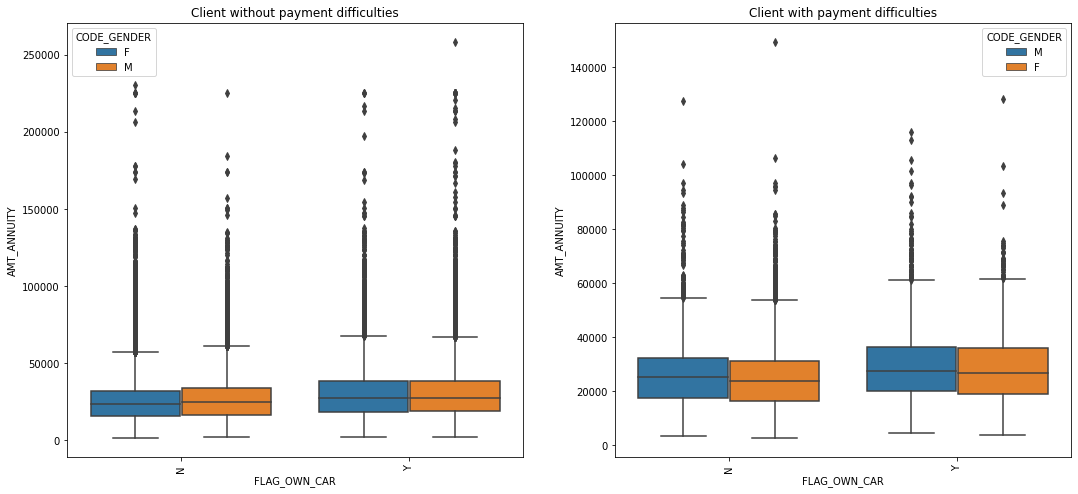

In [358]:
# Numerical categorical analysis of AMT_ANNUITY vs FLAG_OWN_CAR 
plt.figure(figsize=(18,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=df_target0,y='AMT_ANNUITY',x='FLAG_OWN_CAR',hue='CODE_GENDER')
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=df_target1,y='AMT_ANNUITY',x='FLAG_OWN_CAR',hue='CODE_GENDER')
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)

plt.show()
#We don't find any significant difference

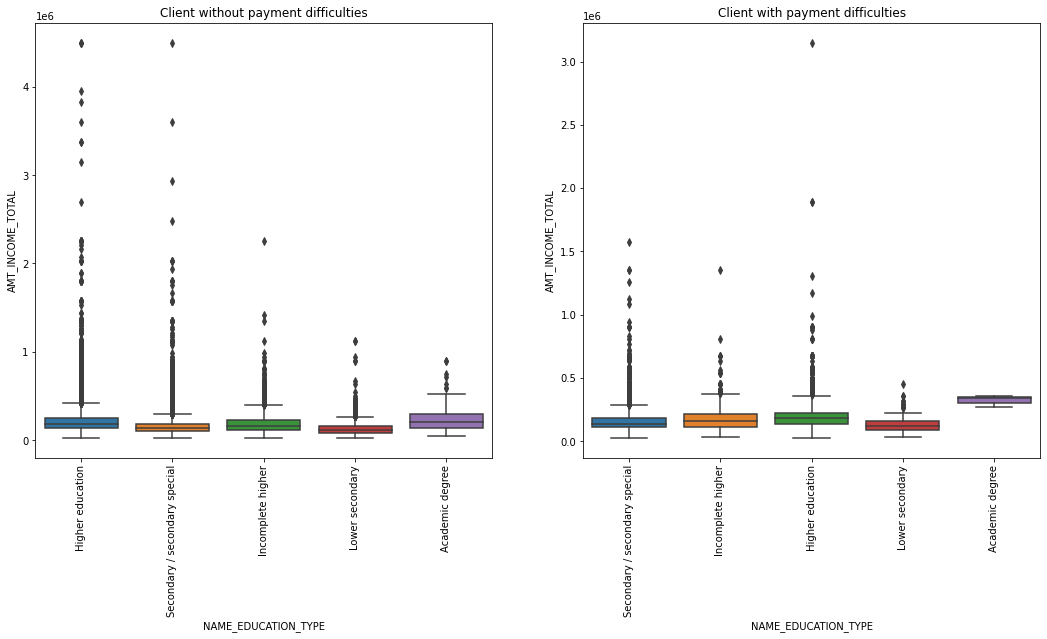

In [359]:
# Based on the education and the income
plt.figure(figsize=(18,8)) 

plt.subplot(1,2,1)
ax = sns.boxplot(data=df_target0[df_target0['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Client without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.boxplot(data=df_target1[df_target1['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Client with payment difficulties')
plt.xticks(rotation=90)
plt.show()

# Cleaning the Previous_application Dataframe
##preapdf is the dataframe for Previous_application

In [360]:
preapdf.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [361]:
#check for missing value percentage
nullvalues=((preapdf.isnull().sum()*100)/len(preapdf))
nullvalues

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [362]:
#Checking for the columns which have missing values more than 40%
nullvalues=nullvalues[nullvalues>40]

nullvalues

AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

In [363]:
#Getting the indexes where nullvaluesl value percentage is more than 40%
column_Drop=nullvalues[nullvalues.values>40]

column_Drop.index

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [364]:
#dropping the columns which have null values more than 40%
preapdf.drop(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],axis=1,inplace=True)

Handling null values in AMT_APPLICATION

In [365]:
#Checking out the values percentage in AMT_APPLICATION

preapdf["AMT_APPLICATION"].value_counts(normalize=True)*100

0.00         23.494115
45000.00      2.863765
225000.00     2.607031
135000.00     2.435496
450000.00     2.329342
               ...    
185292.00     0.000060
225054.00     0.000060
156212.55     0.000060
99896.31      0.000060
267295.50     0.000060
Name: AMT_APPLICATION, Length: 93885, dtype: float64

Observation

As we can see there are approx 23% values which are 0 in AMT_APPLICATION column.We need to remove it as it may affect the EDA process

In [366]:
#Checking out the percentage contribution in AMT_APPLICATION using quantile
preapdf["AMT_APPLICATION"].quantile([0,.25,.50,.75,.99,1])

0.00          0.0
0.25      18720.0
0.50      71046.0
0.75     180360.0
0.99    1350000.0
1.00    6905160.0
Name: AMT_APPLICATION, dtype: float64

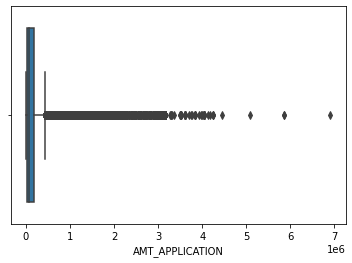

In [367]:
#Checking out the outliers using the boxplot
sns.boxplot(preapdf["AMT_APPLICATION"])

plt.show()


Observation

As we have seen there is no null values in AMT_APPLICATION column but there are some values which are 0. we need to replace them with another value.
Also there are some outliers also present which can affect the analysis. it is better approach to remove them

In [368]:
#Handling the outliers by taking first 99th percentile values
preapdf["AMT_APPLICATION"]=(preapdf[preapdf["AMT_APPLICATION"]<preapdf["AMT_APPLICATION"].quantile(.99)])["AMT_APPLICATION"]

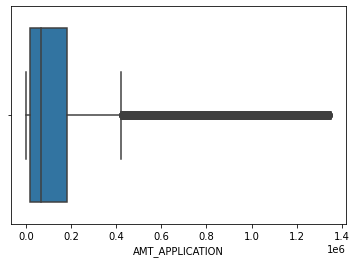

In [369]:
sns.boxplot(preapdf["AMT_APPLICATION"])
plt.show()

After removing the outliers and considering the 99% of AMT_APPLICATION. we can remove those rows which have AMT_APPLICATION value as 0.

In [370]:
preapdf=preapdf[~(preapdf["AMT_APPLICATION"]==0.0)]

In [371]:
preapdf.shape

(1277812, 26)

Cleaning of NAME_CONTRACT_TYPE column

In [372]:
#Checking the percentage value counts in NAME_CONTRACT_TYPE column
preapdf["NAME_CONTRACT_TYPE"].value_counts(normalize=True)*100

Consumer loans     56.955640
Cash loans         36.174336
Revolving loans     6.870025
Name: NAME_CONTRACT_TYPE, dtype: float64

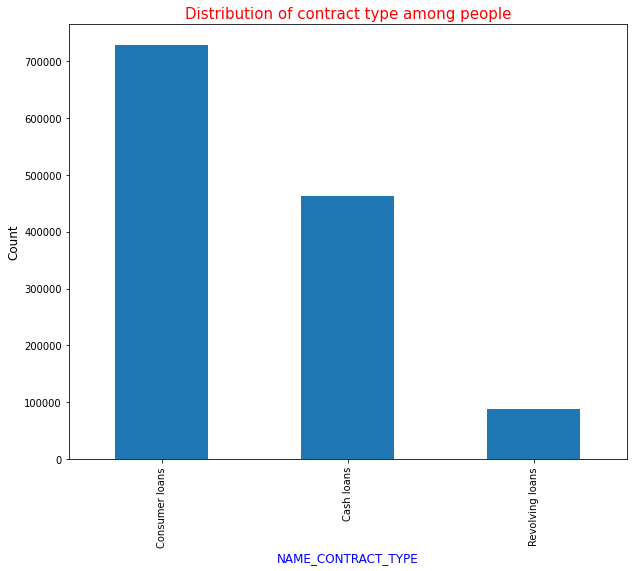

In [373]:
plt.figure(figsize = (10,8))
plt.title('Distribution of contract type among people',fontdict={'fontsize':15,'color':'red'})
preapdf.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.xlabel('NAME_CONTRACT_TYPE',fontdict={'fontsize':12,'fontweight':5,'color':'blue'})
plt.ylabel('Count',fontdict={'fontsize':12,'fontweight':5,'color':'black'})
plt.show()

OBSERVATION

There is no null value in NAME_CONTRACT_TYPE column
Cleaning process in AMT_CREDIT Column

In [374]:
#Checking out the value percentage in DataFrame
preapdf["AMT_CREDIT"].value_counts(normalize=True)*100

45000.00     2.518133
225000.00    1.327895
135000.00    1.016034
450000.00    0.893793
180000.00    0.755432
               ...   
337315.50    0.000078
412110.00    0.000078
331731.00    0.000078
338301.00    0.000078
436370.22    0.000078
Name: AMT_CREDIT, Length: 86803, dtype: float64

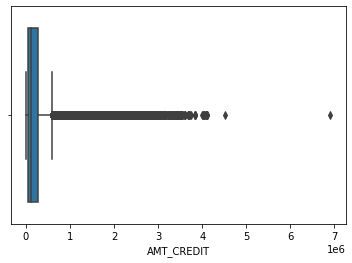

In [375]:
#Checking out the outliers in DataFrame using boxplot
sns.boxplot(preapdf["AMT_CREDIT"])

plt.show()


OBSERVATION

As we can see from the above boxplot there are some outliers present in the data.
There are some null value present in data.

In [376]:
#Checking out the percentage composition on the data
preapdf["AMT_CREDIT"].quantile([0,.25,.50,.75,.99,1])

0.00          0.00
0.25      50553.00
0.50     112500.00
0.75     269550.00
0.99    1557135.54
1.00    6905160.00
Name: AMT_CREDIT, dtype: float64

In [377]:
#Outliers handling by taking the 99th percentile of the data
preapdf["AMT_CREDIT"]=(preapdf[preapdf["AMT_CREDIT"]<preapdf["AMT_CREDIT"].quantile(.99)])["AMT_CREDIT"]

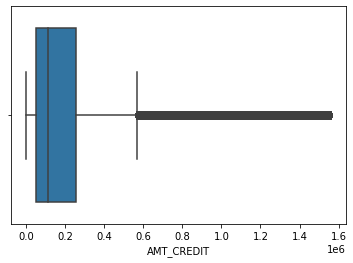

In [378]:
sns.boxplot(preapdf["AMT_CREDIT"])
plt.show()

In [379]:
#Checking out the null values present in the data
preapdf["AMT_CREDIT"].isnull().sum()

12779

In [380]:
preapdf["AMT_CREDIT"]=preapdf["AMT_CREDIT"].fillna(preapdf["AMT_CREDIT"].median())

Checking out the DAYS_DECISION column

In [381]:
#Creating a new column named YEAR_DECISION from DAYS_DECISION
preapdf["YEAR_DECISION"]=preapdf["DAYS_DECISION"]/365

In [382]:
#Taking the absolute value of YEAR_DECISION and round it to the floor value
preapdf["YEAR_DECISION"]=preapdf["YEAR_DECISION"].abs()

preapdf["YEAR_DECISION"]=preapdf["YEAR_DECISION"].round()

preapdf["YEAR_DECISION"]

0          0.0
1          0.0
2          1.0
3          1.0
4          2.0
          ... 
1670209    1.0
1670210    5.0
1670211    4.0
1670212    3.0
1670213    3.0
Name: YEAR_DECISION, Length: 1277812, dtype: float64

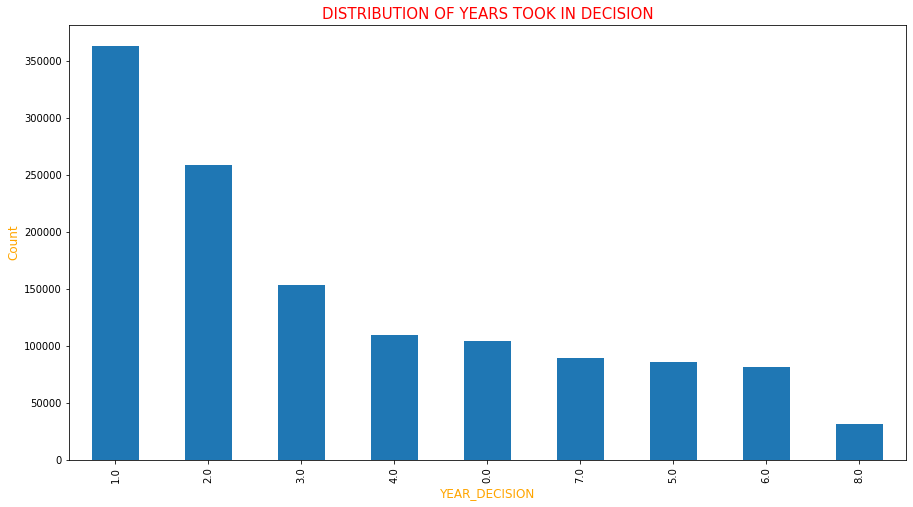

In [383]:
plt.figure(figsize = (15,8))
plt.title('DISTRIBUTION OF YEARS TOOK IN DECISION',fontdict={'fontsize':15,'color':'red'})
preapdf.YEAR_DECISION.value_counts().plot.bar()
plt.xlabel('YEAR_DECISION',fontdict={'fontsize':12,'fontweight':5,'color':'orange'})
plt.ylabel('Count',fontdict={'fontsize':12,'fontweight':5,'color':'orange'})
plt.show()

In [384]:
#Dropping the DAYS_DECISION column from the DataFrame
preapdf.drop(["DAYS_DECISION"],axis=1,inplace=True)

In [385]:
preapdf.info()
#detail infromation of preapdf dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277812 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1277812 non-null  int64  
 1   SK_ID_CURR                   1277812 non-null  int64  
 2   NAME_CONTRACT_TYPE           1277812 non-null  object 
 3   AMT_ANNUITY                  1240723 non-null  float64
 4   AMT_APPLICATION              1253426 non-null  float64
 5   AMT_CREDIT                   1277812 non-null  float64
 6   AMT_GOODS_PRICE              1277812 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1277812 non-null  object 
 8   HOUR_APPR_PROCESS_START      1277812 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1277812 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1277812 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1277812 non-null  object 
 12  NAME_CONTRACT_STATUS         1277812 non-n

# UNIVARIATE ANALYSIS

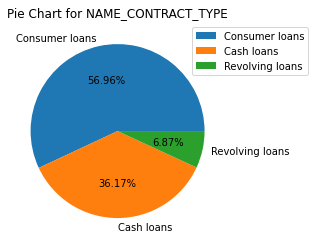

In [386]:
#Univariate Analysis of NAME_CONTRACT_TYPE column
preapdf["NAME_CONTRACT_TYPE"].value_counts(normalize=True).plot.pie(autopct='%1.02f%%',title="Pie Chart for NAME_CONTRACT_TYPE")
plt.legend(loc="upper right",bbox_to_anchor=(1.4,1))

plt.ylabel('')
plt.show()

INFERENCES

Maximum people approx 57% demands for Consumer Loans
only 7% people demands for Revolving Loans which is the least percentage

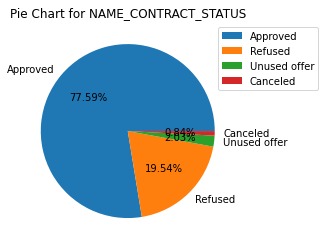

In [387]:
#Univariate Analysis of NAME_CONTRACT_STATUS column
preapdf["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.pie(autopct='%1.02f%%',title="Pie Chart for NAME_CONTRACT_STATUS")
plt.legend(loc="upper right",bbox_to_anchor=(1.4,1))

plt.ylabel('')
plt.show()

Conclusion

Maximum loans has been approved by the banks(approx=78%)
Canceled loans percentage is very less approx 1%
Loans Refused percentage is approx 20%

# Bi-VARIATE ANALYSIS

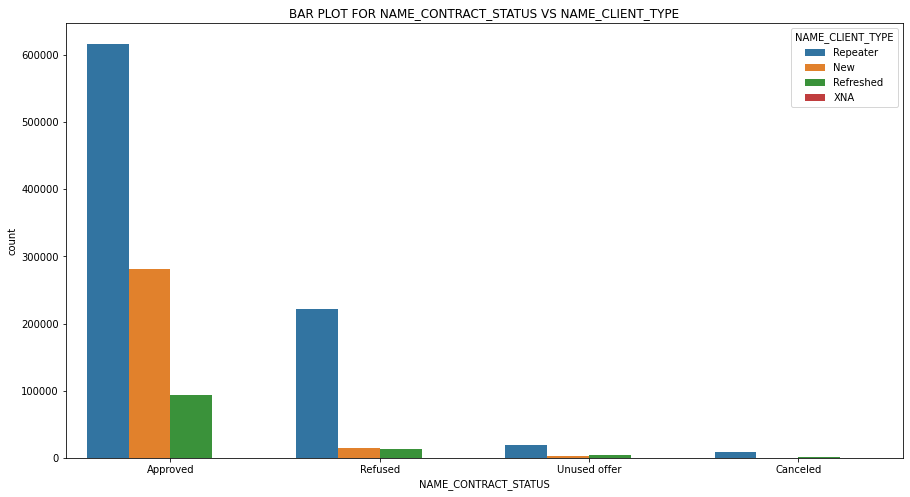

In [388]:
#Bi-Variate Analysis of NAME_CONTRACT_STATUS vs NAME_CLIENT_TYPE
plt.figure(figsize = (15,8))
sns.countplot(data=preapdf,x="NAME_CONTRACT_STATUS",hue="NAME_CLIENT_TYPE")
plt.title("BAR PLOT FOR NAME_CONTRACT_STATUS VS NAME_CLIENT_TYPE")

plt.show()

INFERENCES

The loan approval and refused rate for the repeaters is much higher than any other client types
Loan refused rate for new clients is almost similar like the refreshedclients

In [389]:
df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()


,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,652500.000000,627226.035812,180000.0,225000.0,495000.0,843750.0,2250000.0
Commercial associate,71614.0,202954.529484,147976.585578,26550.0,135000.0,180000.0,225000.0,18000090.0
Maternity leave,5.0,140400.000000,126856.907577,49500.0,67500.0,90000.0,135000.0,360000.0
Pensioner,55362.0,136401.292273,76650.331247,25650.0,90000.0,117000.0,166500.0,2250000.0
State servant,21700.0,179743.947105,100885.528863,27000.0,112500.0,157500.0,225000.0,3150000.0
Student,18.0,170500.000000,106644.682171,81000.0,112500.0,157500.0,178875.0,562500.0
Unemployed,22.0,110536.363636,88055.079059,26550.0,54000.0,78750.0,135000.0,337500.0
Working,158768.0,163168.743018,307583.162170,25650.0,112500.0,135000.0,202500.0,117000000.0


It can be seen that Businessman income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a Businessman could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs


In [390]:
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']



**Getting  top 10 correlation for the Repayers dataframe**

In [391]:
df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,652500.000000,627226.035812,180000.0,225000.0,495000.0,843750.0,2250000.0
Commercial associate,71614.0,202954.529484,147976.585578,26550.0,135000.0,180000.0,225000.0,18000090.0
Maternity leave,5.0,140400.000000,126856.907577,49500.0,67500.0,90000.0,135000.0,360000.0
Pensioner,55362.0,136401.292273,76650.331247,25650.0,90000.0,117000.0,166500.0,2250000.0
State servant,21700.0,179743.947105,100885.528863,27000.0,112500.0,157500.0,225000.0,3150000.0
Student,18.0,170500.000000,106644.682171,81000.0,112500.0,157500.0,178875.0,562500.0
Unemployed,22.0,110536.363636,88055.079059,26550.0,54000.0,78750.0,135000.0,337500.0
Working,158768.0,163168.743018,307583.162170,25650.0,112500.0,135000.0,202500.0,117000000.0


It can be seen that Businessman income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a Businessman could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs

In [392]:
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [393]:
Repayer_df = app_df.loc[app_df['TARGET']==0, cols_for_correlation]

In [394]:
corr_repayer = Repayer_df.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
347,FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999758
838,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
138,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
489,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
408,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
629,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
873,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332
734,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
139,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
104,AMT_ANNUITY,AMT_CREDIT,0.771309


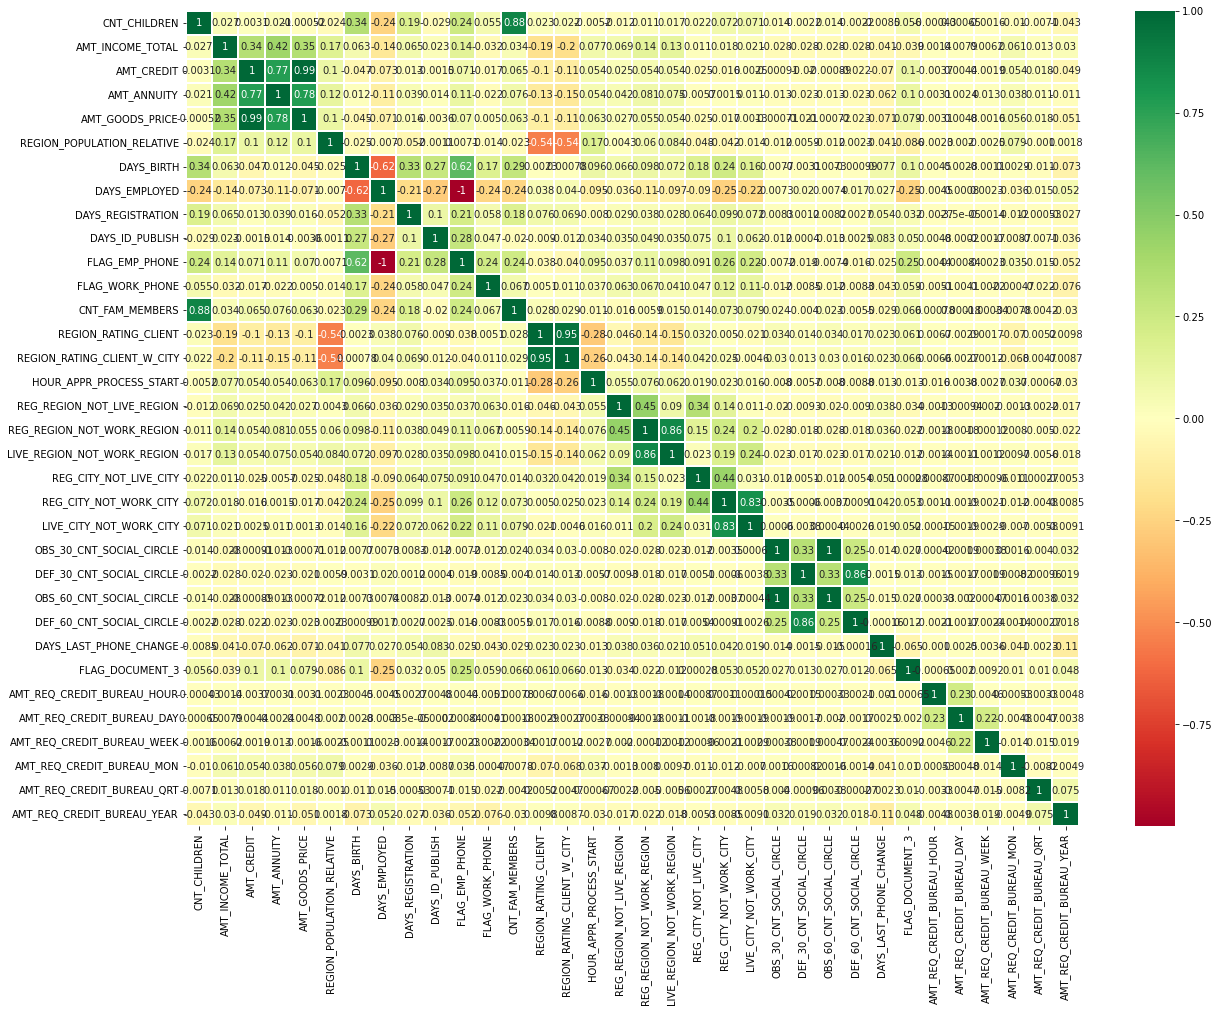

In [401]:
#plotting heatmap to see linear correlation amoung Repayers 

fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)


Observation: Correlating factors amongst repayers

1. Credit amount is highly correlated with:

* Goods Price Amount
* Loan Annuity
* Total Income

2. We can also see that repayers have high correlation in number of days employed.

# MERGING BOTH THE DATAFRAMES

In [395]:
#Merging both the DataFrames
Combineddf=pd.merge(df,preapdf,how='left',on='SK_ID_CURR')

Combineddf.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,YEAR_DECISION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,2.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,2.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,6.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,2.0


In [396]:
#Checking the column values for the merged DataFrame
Combineddf.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'AGE',
       'WORK_EXPERIENCE', 'YEARS_REGISTRATION', 'ID_CHANGE_YEAR', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START_x', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'D

In [397]:
#Dropping the Unused columns from final DataFrame
Combineddf.drop(['YEARS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR','ID_CHANGE_YEAR', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','REGION_POPULATION_RELATIVE'],axis=1,inplace=True)

In [398]:
Combineddf.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,YEAR_DECISION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,2.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,2.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,2.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,6.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,2.0
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,48.0,low_normal,Cash X-Sell: low,0.0
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Audio/Video,POS,XNA,Country-wide,8025.0,Consumer electronics,12.0,high,POS household with interest,1.0
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,Cards,x-sell,Credit and cash offices,-1.0,XNA,0.0,XNA,Card X-Sell,0.0
8,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,18.0,high,Cash X-Sell: high,1.0
9,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Construction Materials,POS,XNA,Stone,30.0,Construction,12.0,middle,POS industry with interest,2.0


# UNIVARIATE ANALYSIS ON CATAGORICAL COLUMNS

In [399]:
Combineddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1105806 entries, 0 to 1105805
Data columns (total 57 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1105806 non-null  int64  
 1   TARGET                        1105806 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1105806 non-null  object 
 3   CODE_GENDER                   1105806 non-null  object 
 4   FLAG_OWN_CAR                  1105806 non-null  object 
 5   FLAG_OWN_REALTY               1105806 non-null  object 
 6   CNT_CHILDREN                  1105806 non-null  int64  
 7   AMT_INCOME_TOTAL              1105806 non-null  float64
 8   AMT_CREDIT_x                  1105806 non-null  float64
 9   AMT_ANNUITY_x                 1105806 non-null  float64
 10  AMT_GOODS_PRICE_x             1105806 non-null  float64
 11  NAME_TYPE_SUITE               1102636 non-null  object 
 12  NAME_INCOME_TYPE            

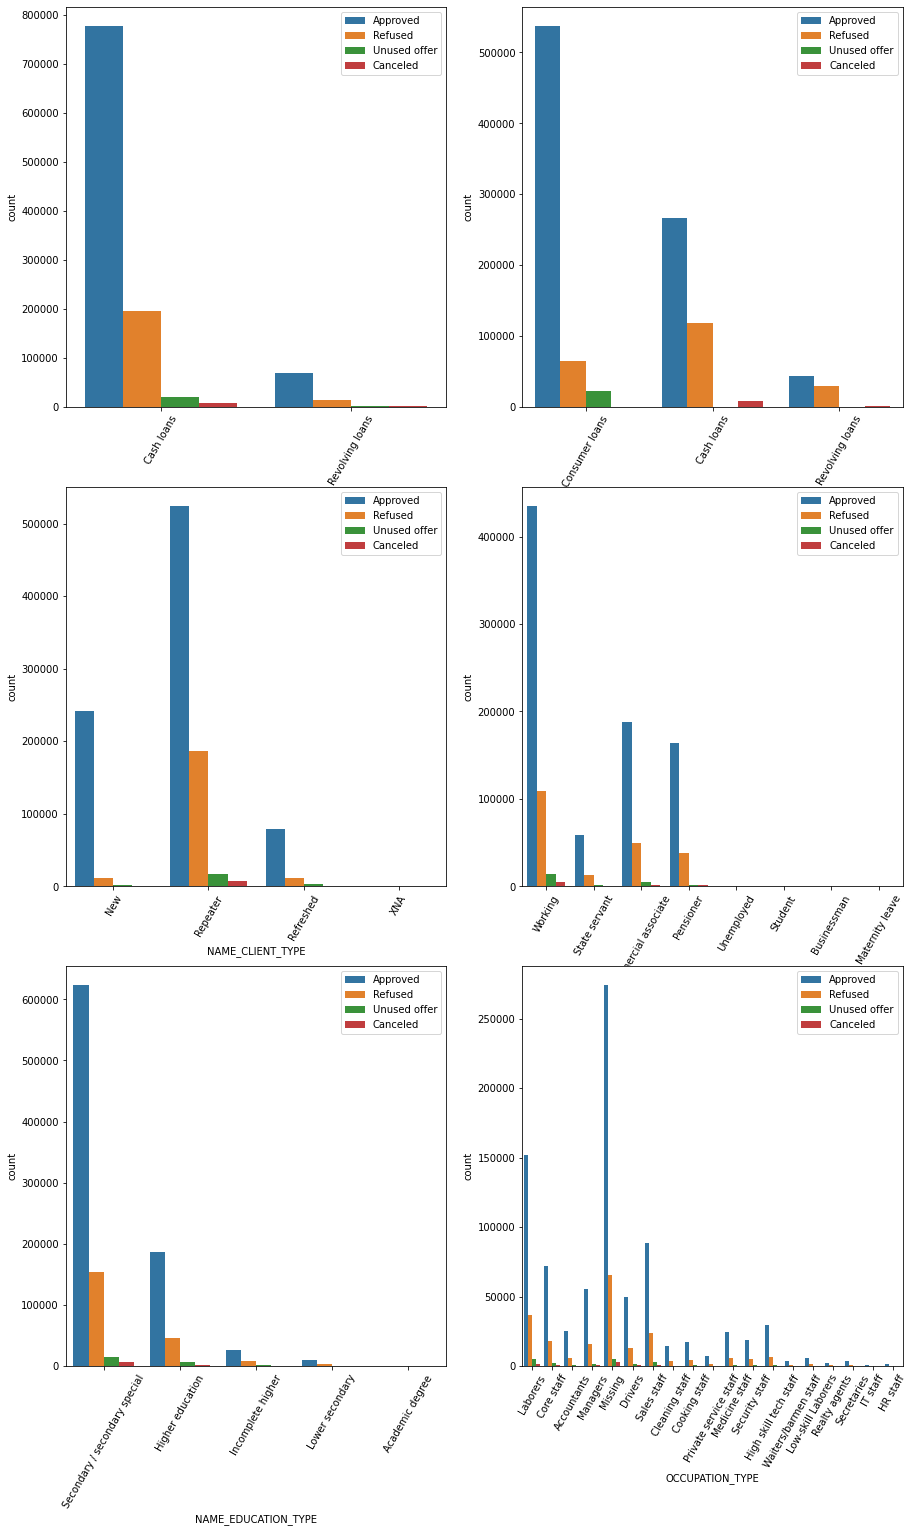

In [400]:
categorical=["NAME_CONTRACT_TYPE_x","NAME_CONTRACT_TYPE_y","NAME_CLIENT_TYPE","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","OCCUPATION_TYPE"]

plt.figure(figsize=(15,25))


for i in (enumerate(categorical)):
    plt.subplot(len(categorical)//2,2,i[0]+1)
    sns.countplot(x=i[1],hue='NAME_CONTRACT_STATUS',data=Combineddf)
    plt.xticks(rotation=60)
    plt.legend(loc="upper right")
plt.show()

Observation

Loan aprroval rates for Consumer Loans is much higher than any other loan.
Banks like to give loans to the Repeaters.
People with Secondary Education or more receives loan approval easily.
Occupation_type Laborers get the more loans then others.
Working class people receives more loan approvals than any other Income_type

# Conclusion

1. Banks have the highest demand 
2. Banks should focus on the cash 
3. There is higher demand for loans from the working group and for higher education from the students.
4. Banks should focus on providing low interest rates to the married and working class people since these two categories are the top most category which is facing the highest payment difficulties.



# Models that can be used

*Binary Logistic Linear Rigression*

As the output of the model is in 0 and 1 as repayer and Defaulter, Binary Regression can predict the output as either customer can be Repayer or defaulter based on its data given.

*Descision Tree*

Descision tree Can predict the output, being internal nodes representing whole dataset and leaf nodes being the predictions.

*Random Forest*

Combination of various Decision trees can be used for prediction using Random Forest, However the the computation time required to train such Random Forest Model is greater as compared to Decision tree but the prediction and the accuracy will be greater than descision tree.
